<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from scipy import special
import warnings
warnings.filterwarnings('ignore')

# Homework 12 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### Preliminary: Distributions ###
The code below will help you in some of the exercises. Please refer to it as needed.

**Discrete Distribution Table Defined by a Probability Function**

`Table().values(values_array).probability_function(name_of_function)` evaluates to the distribution table of a discrete random variable $X$ such that:

- `values_array` is an array consisting of the possible values of $X$
- `name_of_function` is the name of a function that takes $x$ as its argument and returns $P(X =x)$

**Beta Density**

For an array `x` of values in the unit interval, `stats.beta.pdf(x, r, s)` evaluates to the array f(`x`) where $f$ is the beta (`r`, `s`) density.

### Preliminary: Line Plots ###
In Data 8 you used `Table.plot` to draw line plots, but in this class the line plots have typically been drawn using the `plot` function of `matplotlib`. Here is the syntax; you are going to need it in the exercises. It's easier than setting up tables first, especially when you want to overlay multiple plots.

The `pyplot` module of `matplotlib` has been imported for you as `plt`. This is its standard abbreviation.

Let `x` and `y` be two numerical arrays of the same length. Then `plt.plot(x, y)` produces a line plot with values of `x` on the horizontal axis and the corresponding values of `y` on the vertical. The plot "joins the dots" (`x.item(0)`, `y.item(0)`), (`x.item(1)`, `y.item(1)`), (`x.item(2)`, `y.item(2)`), and so on.

The optional argument `lw=n` can be used to set a line width of `n` units. Just use `lw=2` in this homework.

The semicolon at the end of the last line of code in each cell stops `matplotlib` from blurting out text that we don't need here.

Run these cells to see some examples. Note the overlaid plots: they are straightforward to draw, and Python chooses a different color for each plot. 

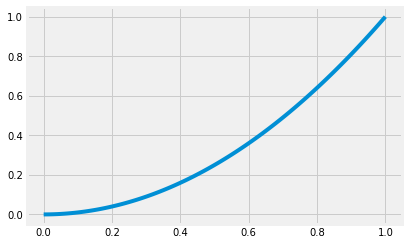

In [2]:
x = np.arange(0, 1.01, 0.01)
x_squared = x ** 2
plt.plot(x, x_squared);

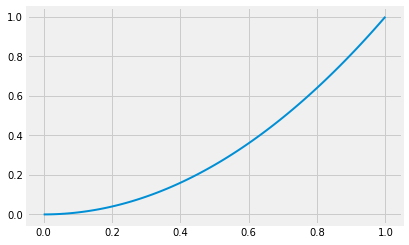

In [3]:
plt.plot(x, x_squared, lw=2);

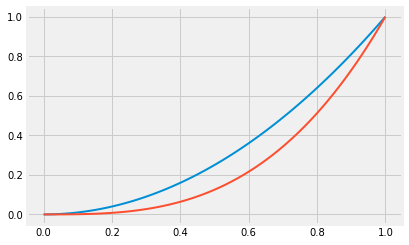

In [4]:
x_cubed = x ** 3
plt.plot(x, x_squared, lw=2)
plt.plot(x, x_cubed, lw=2);

You can get more fancy with labels and legends, but you don't have to do that in this homework.

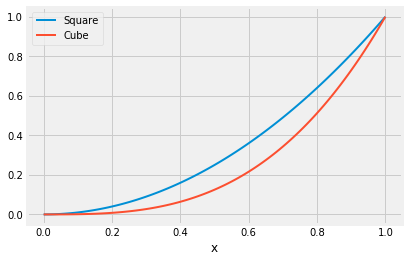

In [5]:
x_cubed = x ** 3
plt.plot(x, x_squared, lw=2, label = 'Square')
plt.plot(x, x_cubed, lw=2, label = 'Cube')
plt.legend()
plt.xlabel('x');

This is only a tiny fraction of what you can do with `matplotlib`. For more, here is a great [tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html) by [Nicolas Rougier](https://www.labri.fr/perso/nrougier/).

### 1.  Heads in Tosses of a Random Coin ###
Let $X$ be a random proportion with a prior distribution that is beta $(2, 3)$. Given $X = p$, let $N$ be the number of heads in 5 tosses of a $p$-coin.

**a)** Plot the prior density of $X$.

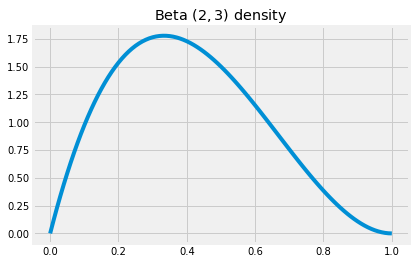

In [6]:
# Your answer to 1a

x = np.arange(0, 1.01, 0.01)

plt.plot(x, stats.beta.pdf(x, 2,3))

plt.title('Beta $(2, 3)$ density');

**b)** For each $n = 0, 1, 2, 3, 4, 5$, plot the posterior density of $X$ given $N=n$. All six plots should be on the same graph. 

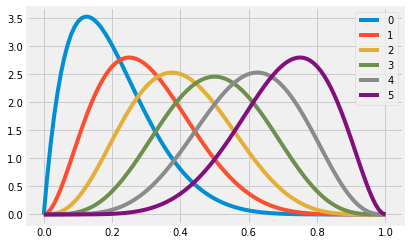

In [7]:
# Your answer to 1b
N = np.array([0,1,2,3,4,5])

for k in N:
    plt.plot(x, stats.beta.pdf(x, k+2,5-k+3), label = k)
plt.legend()
plt.show();

**c)** For each $n = 0, 1, 2, 3, 4, 5$, find the MAP estimate of the probability of heads given $N=n$, by completing the cell below with an appropriate expression. Here `map_estimates` is an array that contains all the MAP estimates. 

By eye, check that your answers are consistent with the graphs in (b).

In [8]:
# Your answer to 1c

r = 2
s = 3
n = 5
k = np.arange(0, n+1)

map_estimates = (r+k-1)/(r+s+n-2)
    
map_estimates

array([0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 ])

**d)** Complete the cell below to display the probability histogram of $N$. You can use any number of lines of code in the definition. In the blanks in the last line of the cell, enter the name of the distribution and provide the numerical parameters.

If you want to, you can use `special.factorial(j)` to get the factorials of the non-negative integer array `j`. The `special` module of `SciPy` has been imported for you. But you can also write the code without computing factorials.

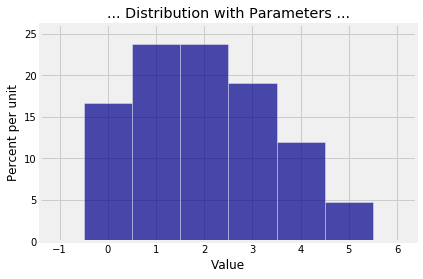

In [9]:
# Your answer to 1d

def probs_N(n):
    C_rs = special.gamma(5)/(special.gamma(2)*special.gamma(3))
    C_rksn = special.gamma(10)/(special.gamma(2+n)*special.gamma(3+5-n))
    return special.comb(5,n)*(C_rs/C_rksn)

dist = Table().values(N).probability_function(probs_N)
Plot(dist)
plt.title('... Distribution with Parameters ...');

**e)** Find the numerical value of $E(N)$ without using a code cell.

#newpage

### 2. Two-Colored Die ###
A die that has two green faces and four blue faces is rolled repeatedly. Let $R$ be the number of rolls till both colors have appeared.

**a)** Find $E(R)$.

**b)** Find $SD(R)$.

#newpage

### 3. Chinese Restaurant Process: Long Run Proportion at Table 1 ###
The goal of this exercise is for you to explain a density that you observed at the end of Lab 10.

Parts **a** and **b** are about the "beta binomial" process we studied extensively in class. You can just apply the results derived in class. You'll find them in [Chapter 21](http://prob140.org/textbook/Chapter_21/00_The_Beta_and_the_Binomial.html) of the textbook.

**a)** Define the "Beta $(1, \theta)$ Binomial" process as follows:

- $X$ has beta $(1, \theta)$ distribution.
- Given $X = p$, there is a sequence of i.i.d. Bernoulli $(p)$ trials $I_1, I_2, \ldots $.
- $S_n = I_1 + I_2 + \cdots + I_n$ is the number of successes in the first $n$ trials.

Fill in the blank with the name of a distribution and the appropriate parameters:

As $n$ gets large, with probability 1 the proportion $\frac{S_n}{n}$ approaches a limit. The distribution of this limit is $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~}$.

**b)** For the Beta $(1, \theta)$ Binomial process, find the transition probability $P(S_n = k+1 \mid S_{n-1} = k)$.

Given $S_{n-1} = k$, what are the other possible values of $S_n$ and what are their probabilities?

**c)** Now refer to Lab 10 for the description of Chinese Restaurant process with parameter $\theta$. As in the lab, let $W_n$ be the number of people at Table 1 at time $n$. The goal is of this part of the exercise is to figure out the transition behavior of $W_n$.

Because Table 1 starts deterministically with Person 1 at time 1, we have to be a bit careful about what's random and what's constant. Let's consider $V_n = W_n - 1$, the random number of people *other than Person 1* who are at Table 1 at time $n$.

Find $P(V_{n+1} = k+1 \mid V_n = k)$. This is a straightforward application of the rules of the Chinese Restaurant process, but you have to be careful about how many people are at Table 1 when Person $n+1$ enters the system.

**d)** Given $V_n = k$, what are the possible values of $V_{n+1}$? Compare the transition behavior of the following two sequences:

- $V_2, V_3, \ldots $ of the Chinese Restaurant process with parameter $\theta$
- $S_1, S_2, \ldots $ of the Beta $(1, \theta)$ Binomial process

Then explain why the distribution of the long run proportion of people at Table 1 of the Chinese Restaurant process is beta $(1, \theta)$ where $\theta$ is the parameter of the process. That is, recall that you saw in the lab that the paths of $\frac{W_n}{n}$ converge as $n \to \infty$, and explain why the limit of $\frac{W_n}{n}$ as $n \to \infty$ has the beta $(1, \theta)$ distribution.

#newpage

### 4. Sections ###
A class of 60 students has three sections. Summary statistics for scores on Quiz 7:
- Section 1: 25 students, mean 23, SD 3
- Section 2: 20 students, mean 25, SD 2 
- Section 3: 15 students, mean 27, SD 4

Let $S$ be the Quiz 7 score of a student picked at random from the class. Use the code cell below to calculate numerical answers for parts a and b.

**a) [WRITTEN + CODE]** Find $E(S)$.

**b) [WRITTEN + CODE]** Find $SD(S)$.

In [10]:
#calculation for 4a
E_s = (25/60)*23+(20/60)*25+(15/60)*27
E_s

24.666666666666664

In [11]:
#calculation for 4b
Var_s = (25*((23**2)+9)+20*((25**2)+4)+15*((27**2)+16))/60-(E_s)**2
SD_s = Var_s**(1/2)
Var_s, SD_s

(11.638888888889028, 3.4115815817431403)

#newpage

### 5. Uniform Stick-Breaking ###
A point $X$ is chosen uniformly from the interval $(0, 10)$ and then a point $Y$ is chosen uniformly from the interval $(0, X)$. This can be imagined as snapping a stick of length 10 and then snapping one of the broken bits. [Stick-breaking](https://en.wikipedia.org/wiki/Dirichlet_process#The_stick-breaking_process) processes are related to the Chinese Restaurant process.

**a)** Find $E(X)$ and $Var(X)$. See [Section 15.3](http://prob140.org/textbook/Chapter_15/03_Expectation.html#Uniform-$(a,-b)$) of the textbook for the variance of the uniform.

**b)** Find $E(Y)$ and $Var(Y)$ by conditioning on $X$.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 12 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 12 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 